# Metody obliczeniowe w nauce i technice

## Laboratorium 3 - Singular Value Decomposition

### Sprawozdanie sporządził: Marcin Zielonka

### Wstęp

Do przeprowadzenia wszystkich obliczeń i wyrysowania wykresów, skorzystam z gotowych funkcjonalności zawartych w bibliotekach `numpy`, `matplotlib`, `math` oraz `imageio`

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from math import cos, sin, pi
import imageio

Dodatkowo definiuję funkcję pomocniczą, która posłuży do rysowania wykresu 3D na podstawie tablicy z koordynatami X, Y Z:

In [52]:
def show3D(C):
    plt.figure(figsize=(10, 10))
    plt.axes(projection='3d').plot3D(C[0], C[1], C[2])
    plt.show()

### Zadanie 1: Przekształcenie sfery w elipsoidę

1. Korzystając z równania parametrycznego narysuj sferę jednostkową w 3D

$$
\mathbf{v}=
\begin{bmatrix}
\cos{(s)}\sin{(t)} \\ \sin{(s)}\sin{(t)} \\ \cos{(t)}
\end{bmatrix}
$$

$$
s \in [0, 2\pi], t \in [0, \pi]$$

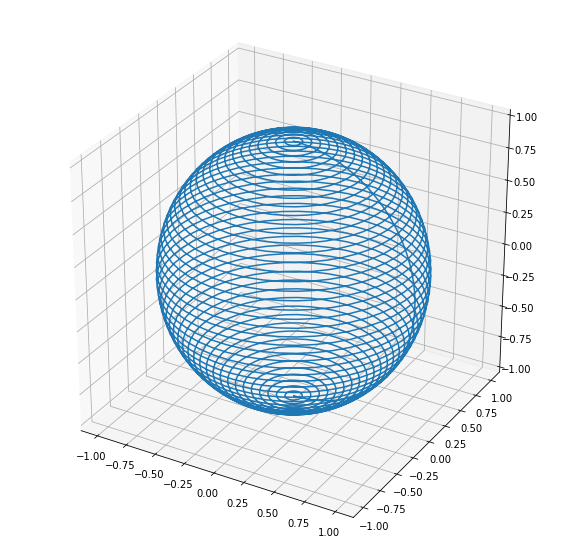

In [53]:
s = np.linspace(0, 2 * pi, 50)
t = np.linspace(0, pi, 50)

s, t = np.meshgrid(s, t)

X = np.array(np.cos(s) * np.sin(t)).flatten()
Y = np.array(np.sin(s) * np.sin(t)).flatten()
Z = np.array(np.cos(t)).flatten()

C = np.row_stack([X, Y, Z])

show3D(C)

2. Wygeneruj 3 różne macierze $\mathbf{A_1}, \mathbf{A_2}, \mathbf{A_3}, (\mathbf{A_i} \in \mathbb{R}^{3×3})$, za ich pomocą dokonaj przekształcenia sfery w elipsoidę, a następnie przedstaw wizualizację uzyskanego wyniku.

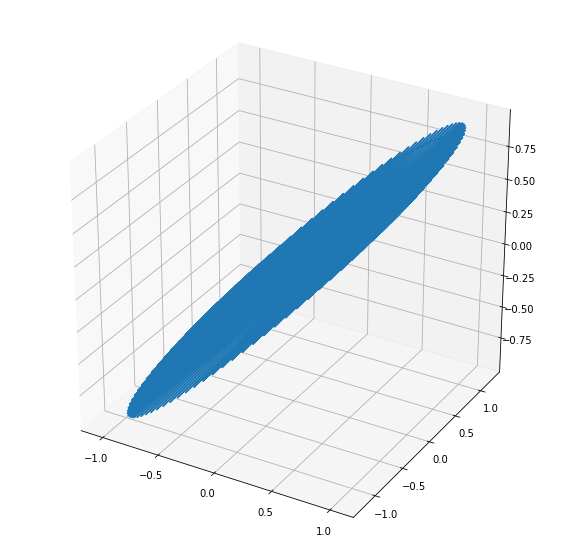

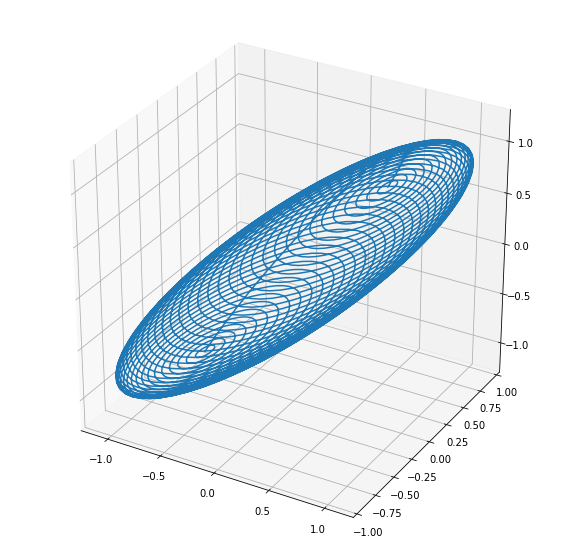

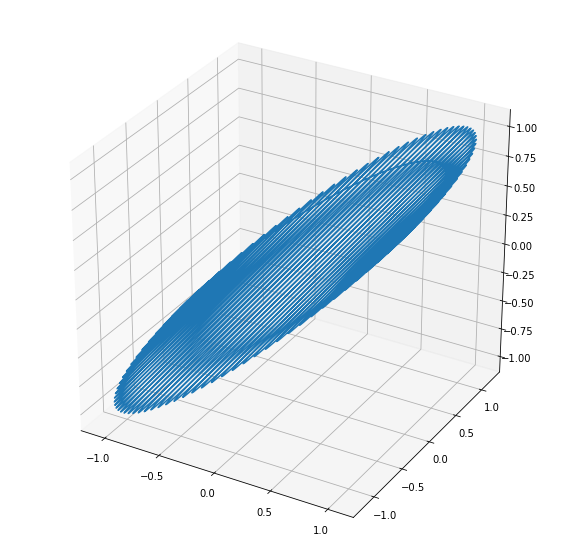

In [87]:
A1 = np.random.rand(3,3)
A2 = np.random.rand(3,3)
A3 = np.random.rand(3,3)

for A in [A1, A2, A3]:
    result = A @ C
    show3D(result)


3. Dokonaj rozkładu według wartości osobliwych (SVD) każdej macierzy $\mathbf{A_i}$. Na wykresie elipsoidy odpowiadającej przekształceniu $\mathbf{A_i}$ dodaj wizualizację jej półosi wyznaczonych za pomocą SVD.

Legenda do kodu poniżej:
* `U`, `D`, `V` - wartości osobliwe uzyskane z SVD macierzy `A`
* `E` - elipsoida uzyskana poprzez transformację sfery jednostkowej (koordynaty `C`) przez macierz `A`
* `x_start`, `x_end`, itd. - zmienne pomocnicze służące do wyrysowania półosi na wykresie 

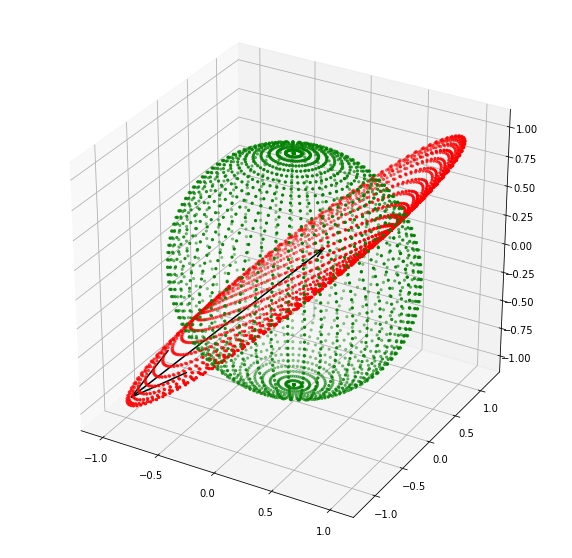

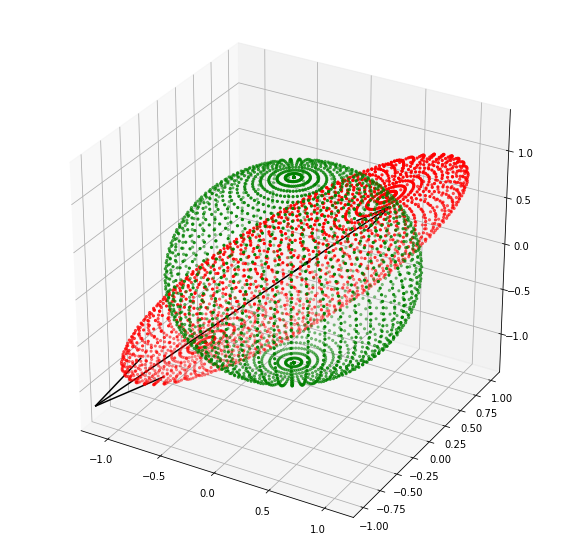

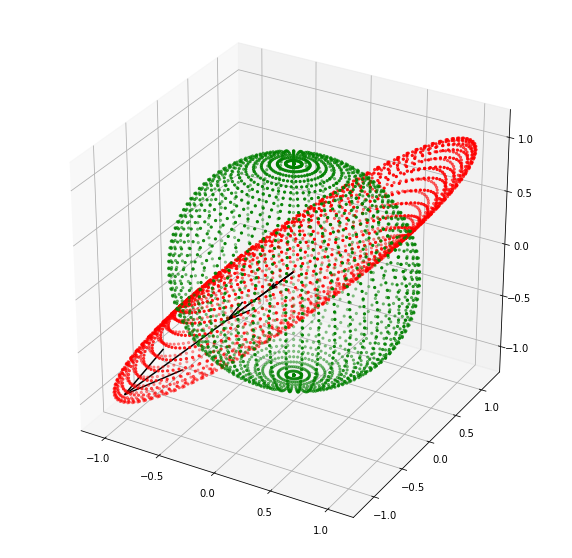

In [89]:
for A in [A1, A2, A3]:
    U, D, V = np.linalg.svd(A)
    E = A @ C

    x_start, y_start, z_start = [[0] * 3] * 3
    x_end = y_end = z_end = [0] * 3
    
    for i, diag_D in enumerate(np.diag(D)):
        Udiag_D = np.dot(U, diag_D)
        x_end[i] = Udiag_D[0]
        y_end[i] = Udiag_D[1]
        z_end[i] = Udiag_D[2]
        
    quiver = [x_start, y_start, z_start, x_end, y_end, z_end]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')
    
    ax.scatter(C[0], C[1], C[2], color='green', marker='.')
    ax.scatter(E[0], E[1], E[2], color='red', marker='.')
    ax.quiver(x_start, y_start, z_start, x_end, y_end, z_end, color='black')
   
    plt.show()


4. Znajdź taką macierz $\mathbf{A_i}$, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100. Narysuj odpowiadającą jej elipsoidę.

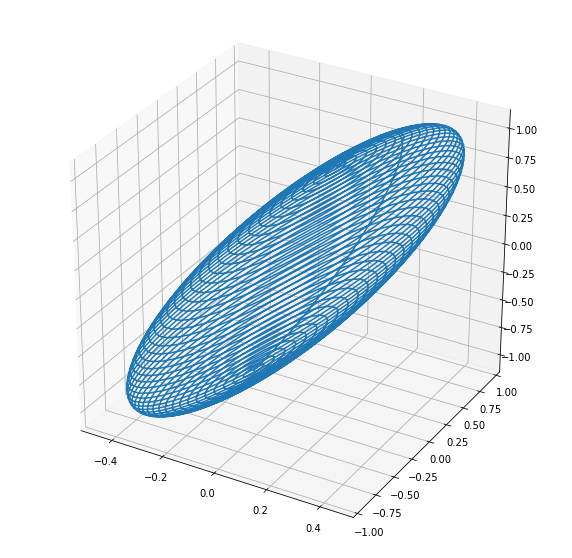

In [56]:
def find_svd_matrix(min):
    while True:
        result = np.random.rand(3,3)
        U, D, V = np.linalg.svd(result)
        
        if (D[0] / D[1]) >= min:
            break
        
        return result

A4 = find_svd_matrix(100)
result = A4 @ C

show3D(result)

5. Dla wybranej macierzy $\mathbf{A_i}$ przedstaw wizualizację $\mathbf{S{V_i}}^T$, $\mathbf{S\Sigma_i{V_i}}^T$, $\mathbf{SU_i\Sigma_i{V_i}}^T$, gdzie

$$\mathbf{A_i}=\mathbf{U_i\Sigma_i{V_i}}^T,$$
$\mathbf{S}$ oznacza sferę z punktu 1.

Do wizualizacji wykorzystam macierz $A_1$:

In [92]:
U, D, V = np.linalg.svd(A1)

Wizualizacja $\mathbf{S{V_i}}^T$:

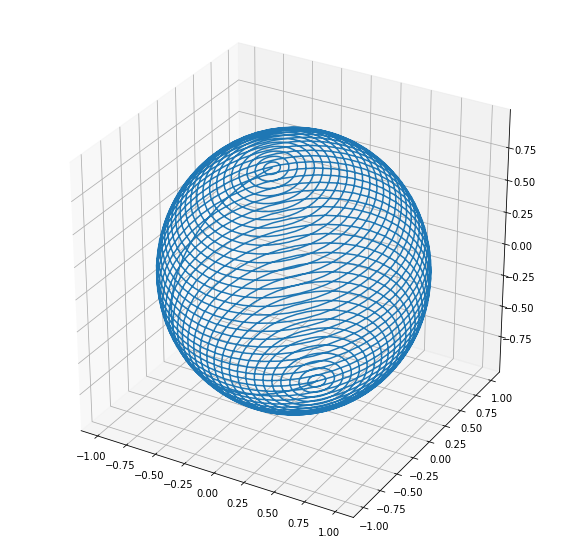

In [94]:
result = V.T @ C
show3D(result)

Wizualizacja $\mathbf{S\Sigma_i{V_i}}^T$:

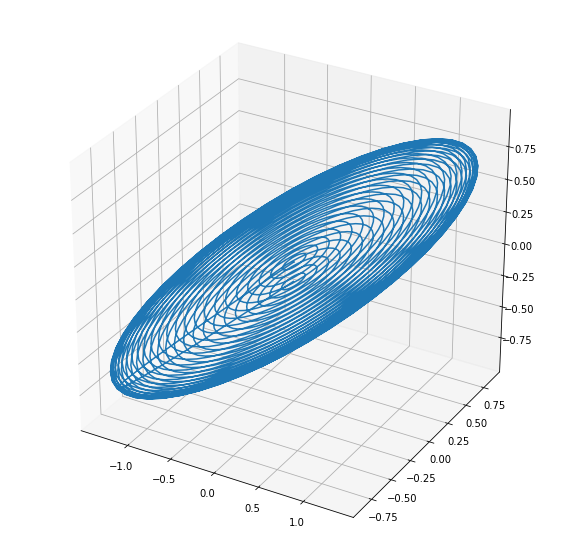

In [95]:
result = (C.T * D @ V).T
show3D(result)

Wizualizacja $\mathbf{SU_i\Sigma_i{V_i}}^T$:

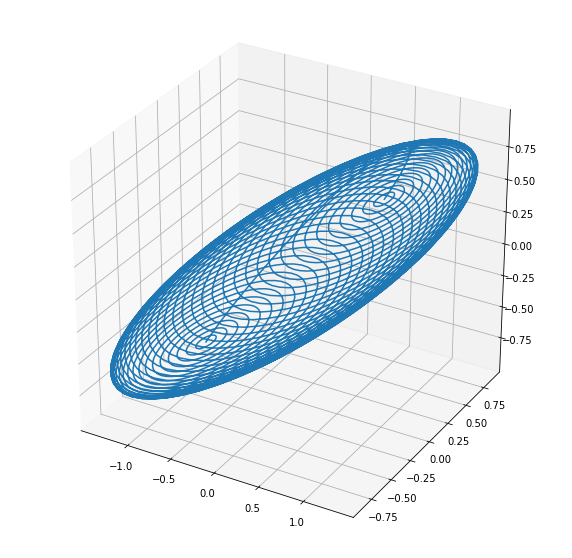

In [96]:
result = (C.T @ U * D @ V).T
show3D(result)

### Zadanie 2: Kompresja obrazu

1. Przygotuj przykładowe zdjęcie o rozmiarze 512x512 pikseli (np. *Lenna image*)

2. Oblicz SVD macierzy pikseli $\mathbf{I}$, a następnie dokonaj przybliżenia tej macierzy za pomocą *low rank approximation* ($k$ pierwszych wartości osobliwych) uzyskując kompresję obrazu wejściowego.

$$\mathbf{I}=\sum_{i=0}^k {\sigma_i\mathbf{u_i}\mathbf{v_i}^T}$$

gdzie $\sigma_i$ jest $i$-tą wartością osobliwą macierzy $\mathbf{I}$, $\mathbf{u_i}$ jest lewym wektorem osobliwym, a $\mathbf{v_i}$ - prawym wektorem osobliwym.

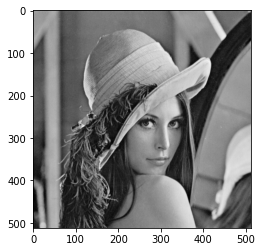

In [36]:
from PIL import Image

img = Image.open('lenna-img.png')

img = img.convert('LA')
img = np.array(list(img.getdata(band=0)), float)
img.shape = (512, 512)

plt.imshow(img, cmap='gray')
plt.show()

U, D, V = np.linalg.svd(img)

3. Porównaj obraz wynikowy z obrazem źródłowym dla różnych wartości $k$ (np. przedstawiając różnicę pomiędzy nimi).

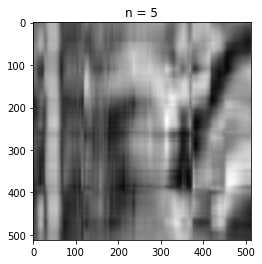

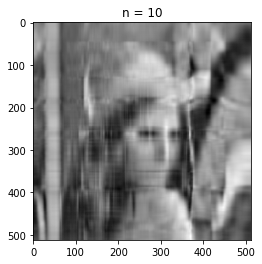

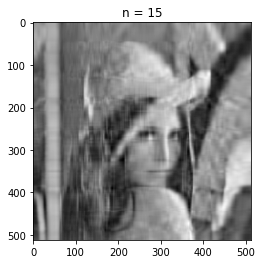

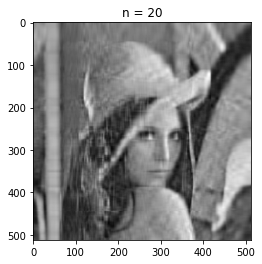

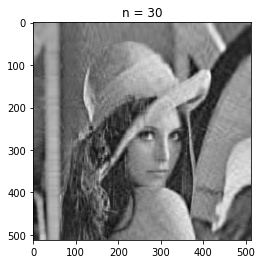

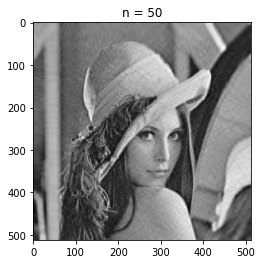

In [37]:
for i in [5, 10, 15, 20, 30, 50]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()
